In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce


eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
    "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"
]

CH4df = pd.read_csv('/content/CH4_Emissions.csv')
CO2df = pd.read_csv('/content/CO2_Emissions.csv')
GHGdf = pd.read_csv('/content/GHG_Emissions.csv')
N2Odf = pd.read_csv('/content/N2O_Emissions.csv')
NOxdf = pd.read_csv('/content/NOx_Emissions.csv')
SO2df = pd.read_csv('/content/SO2_emissions.csv')
Renewable_Electricity = pd.read_csv('/content/Renewable_Electricity_Production_Dataset.csv')

# rinomino la colonna : "Country and area" in "Country"
Renewable_Electricity = Renewable_Electricity.rename(columns={"Country and area": "Country"})


def df_to_long(df, value):
  # Conversione in formato long
  df_long = df.melt(id_vars=["Country"],
                    var_name="Year",
                    value_name=value)

  # Conversione della colonna "Year" in numerico
  df_long["Year"] = pd.to_numeric(df_long["Year"])

  return df_long


# Creo una colonna unique key per successivamente mergiare i vari dataframe
def add_unique_key(df):
  df["unique_key"] = df["Country"] + "_" + df["Year"].astype(str)
  return df

# seleziono solo le righe contenenti i paesi europei
def eu_state(df, eu_countries):
  df_eu = df[df['Country'].isin(eu_countries)]
  return df_eu


CH4df_eu = add_unique_key(df_to_long(eu_state(CH4df, eu_countries), "CH4"))
CO2df_eu = add_unique_key(df_to_long(eu_state(CO2df, eu_countries), "CO2"))
GHGdf_eu = add_unique_key(df_to_long(eu_state(GHGdf, eu_countries), "GHG"))
N2Odf_eu = add_unique_key(df_to_long(eu_state(N2Odf, eu_countries), "N2O"))
NOxdf_eu = add_unique_key(df_to_long(eu_state(NOxdf, eu_countries), "NOx"))
SO2df_eu = add_unique_key(df_to_long(eu_state(SO2df, eu_countries), "SO2"))
Renewable_Electricity_eu = add_unique_key(df_to_long(eu_state(Renewable_Electricity, eu_countries), "Renewable_Electricity"))

SO2df_eu.info()
SO2df_eu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     884 non-null    object 
 1   Year        884 non-null    int64  
 2   SO2         884 non-null    float64
 3   unique_key  884 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 27.8+ KB


,Country,Year,SO2,unique_key
0,Austria,1990,73.63,Austria_1990
1,Belgium,1990,364.75,Belgium_1990
2,Bulgaria,1990,446.05,Bulgaria_1990
3,Croatia,1990,168.12,Croatia_1990
4,Cyprus,1990,31.75,Cyprus_1990
...,...,...,...,...
879,Romania,2023,62.67,Romania_2023
880,Slovakia,2023,7.63,Slovakia_2023
881,Slovenia,2023,6.33,Slovenia_2023
882,Spain,2023,179.33,Spain_2023


In [2]:
# Funzione per mantenere solo unique_key + colonna
def reduce_to_value_column(df, value_col):
    return df[['unique_key', value_col]]

# Applico la funzione per ogni df
CH4df_eu_reduced = reduce_to_value_column(CH4df_eu, 'CH4')
CO2df_eu_reduced = reduce_to_value_column(CO2df_eu, 'CO2')
GHGdf_eu_reduced = reduce_to_value_column(GHGdf_eu, 'GHG')
N2Odf_eu_reduced = reduce_to_value_column(N2Odf_eu, 'N2O')
NOxdf_eu_reduced = reduce_to_value_column(NOxdf_eu, 'NOx')
SO2df_eu_reduced = reduce_to_value_column(SO2df_eu, 'SO2')
Renewable_Electricity_reduced = reduce_to_value_column(Renewable_Electricity_eu, 'Renewable_Electricity')

# Lista Dataframe da mergiare
dfs = [
    CH4df_eu_reduced,
    CO2df_eu_reduced,
    N2Odf_eu_reduced,
    NOxdf_eu_reduced,
    SO2df_eu_reduced,
    Renewable_Electricity_reduced
]

# Merge progressivo su unique_key
merged_df = reduce(lambda left, right: pd.merge(left, right, on='unique_key', how='outer'), dfs)

# ripristino Country e Year da uno dei DataFrame originali:
metadata = CH4df_eu[['unique_key', 'Country', 'Year']]
merged_df = pd.merge(metadata, merged_df, on='unique_key', how='right')

# sostituisco NAN con 0 dove i valori non sono presenti
#merged_df['Renewable_Electricity'] = merged_df['Renewable_Electricity'].fillna(0)



merged_df.info()
merged_df




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unique_key             884 non-null    object 
 1   Country                884 non-null    object 
 2   Year                   884 non-null    int64  
 3   CH4                    884 non-null    float64
 4   CO2                    884 non-null    float64
 5   N2O                    884 non-null    float64
 6   NOx                    884 non-null    float64
 7   SO2                    884 non-null    float64
 8   Renewable_Electricity  841 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 62.3+ KB


,unique_key,Country,Year,CH4,CO2,N2O,NOx,SO2,Renewable_Electricity
0,Austria_1990,Austria,1990,415.66,62124.70,14.50,216.37,73.63,64.63
1,Austria_1991,Austria,1991,410.66,65725.53,14.61,225.94,70.66,63.6
2,Austria_1992,Austria,1992,399.27,60204.07,13.98,214.48,54.13,70.52
3,Austria_1993,Austria,1993,395.90,60635.42,14.08,205.89,52.75,72.03
4,Austria_1994,Austria,1994,384.30,61002.44,13.92,197.52,47.11,69.13
...,...,...,...,...,...,...,...,...,...
879,Sweden_2019,Sweden,2019,179.57,44184.39,76.17,116.14,4.44,50.13
880,Sweden_2020,Sweden,2020,123.55,26765.43,44.86,67.28,2.36,50.81
881,Sweden_2021,Sweden,2021,120.78,26849.85,41.98,62.87,2.31,50.37
882,Sweden_2022,Sweden,2022,188.55,46393.61,79.98,121.95,4.66,50.68


In [3]:
# Totale Paesi più inquinanti in tonnellate per emissioni

# Colonne da aggregare
inquinanti = ['CH4', 'CO2', 'N2O', 'NOx', 'SO2']

# Converto eventuali oggetti in numerici
merged_df[inquinanti] = merged_df[inquinanti].apply(pd.to_numeric, errors='coerce')

# Calcola la somma totale in tonnellate per ogni inquinante
totale_inquinanti_df = merged_df.groupby('Country')[inquinanti].sum().reset_index()

totale_inquinanti_df.head()

,Country,CH4,CO2,N2O,NOx,SO2
0,Austria,10306.56,2208730.91,699.19,6469.68,905.91
1,Belgium,12597.03,3754316.63,1151.17,9541.59,4675.29
2,Bulgaria,12286.00,1690011.73,792.88,4963.35,12707.63
3,Croatia,5145.75,639577.91,542.05,2268.78,1761.80
4,Cyprus,1575.98,241482.24,348.18,624.11,946.04


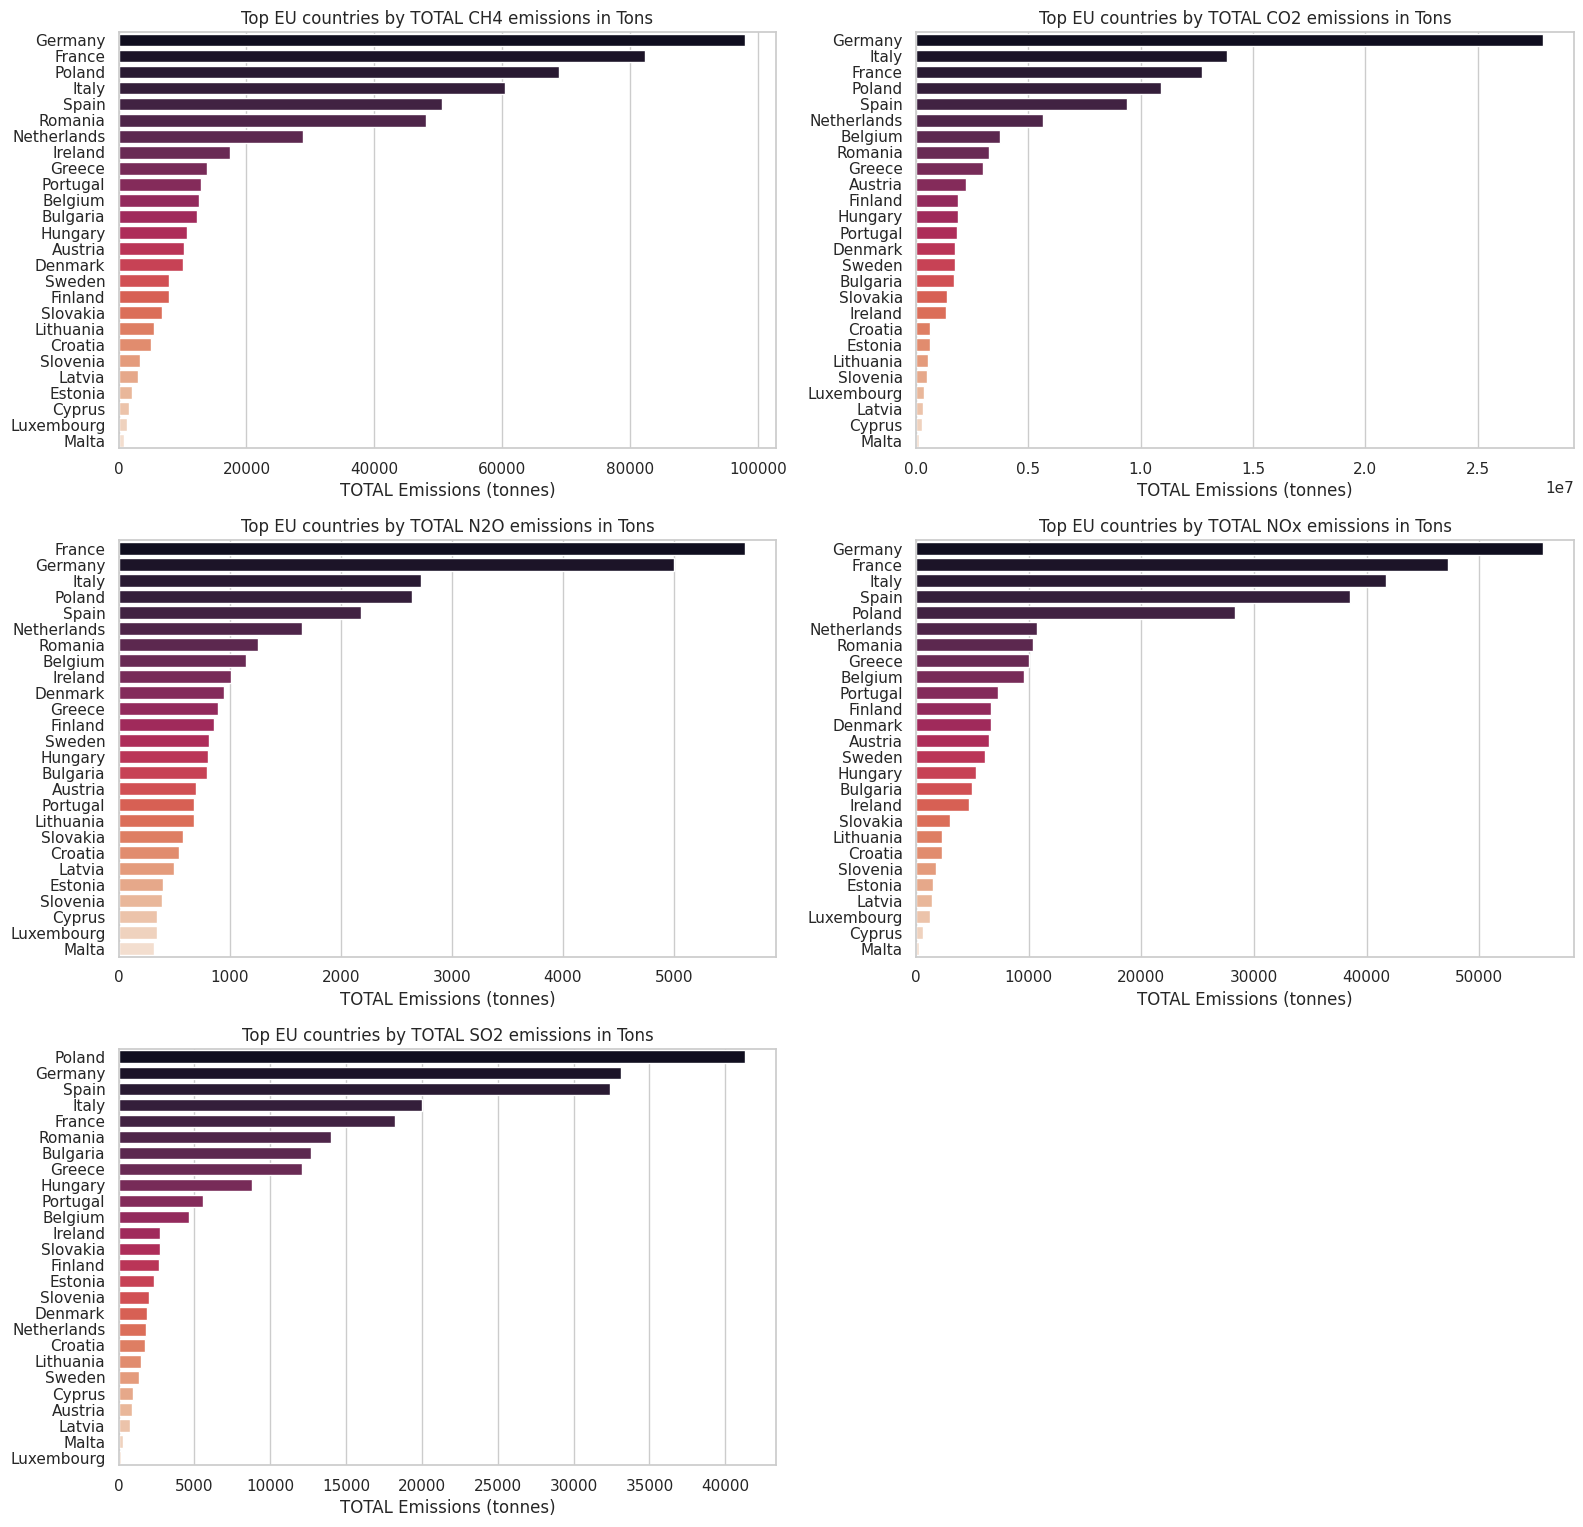

In [4]:
# Stile dei grafici
sns.set(style="whitegrid")

def bar_visulization(df, label):
  # Crea i subplot (layout)
  fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
  axes = axes.flatten()

  # Plot per ogni inquinante
  for i, inquinante in enumerate(inquinanti):
      ax = axes[i]

      # Ordina i paesi per livello di inquinamento
      dati = df.sort_values(by=inquinante, ascending=False)

      # Usa hue e disattiva legenda per evitare il warning
      sns.barplot(
          x=inquinante,
          y='Country',
          data=dati,
          ax=ax,
          hue='Country',
          dodge=False,
          palette='rocket',
          legend=False
      )

      ax.set_title(f'Top EU countries by {label} {inquinante} emissions in Tons', fontsize=12)
      ax.set_xlabel(f"{label} Emissions (tonnes)")
      ax.set_ylabel("")

  # Rimuovo eventuali subplot vuoti
  for j in range(len(inquinanti), len(axes)):
      fig.delaxes(axes[j])

  # Ottimizzo spazi
  plt.tight_layout()
  plt.show()


bar_visulization(totale_inquinanti_df, "TOTAL")

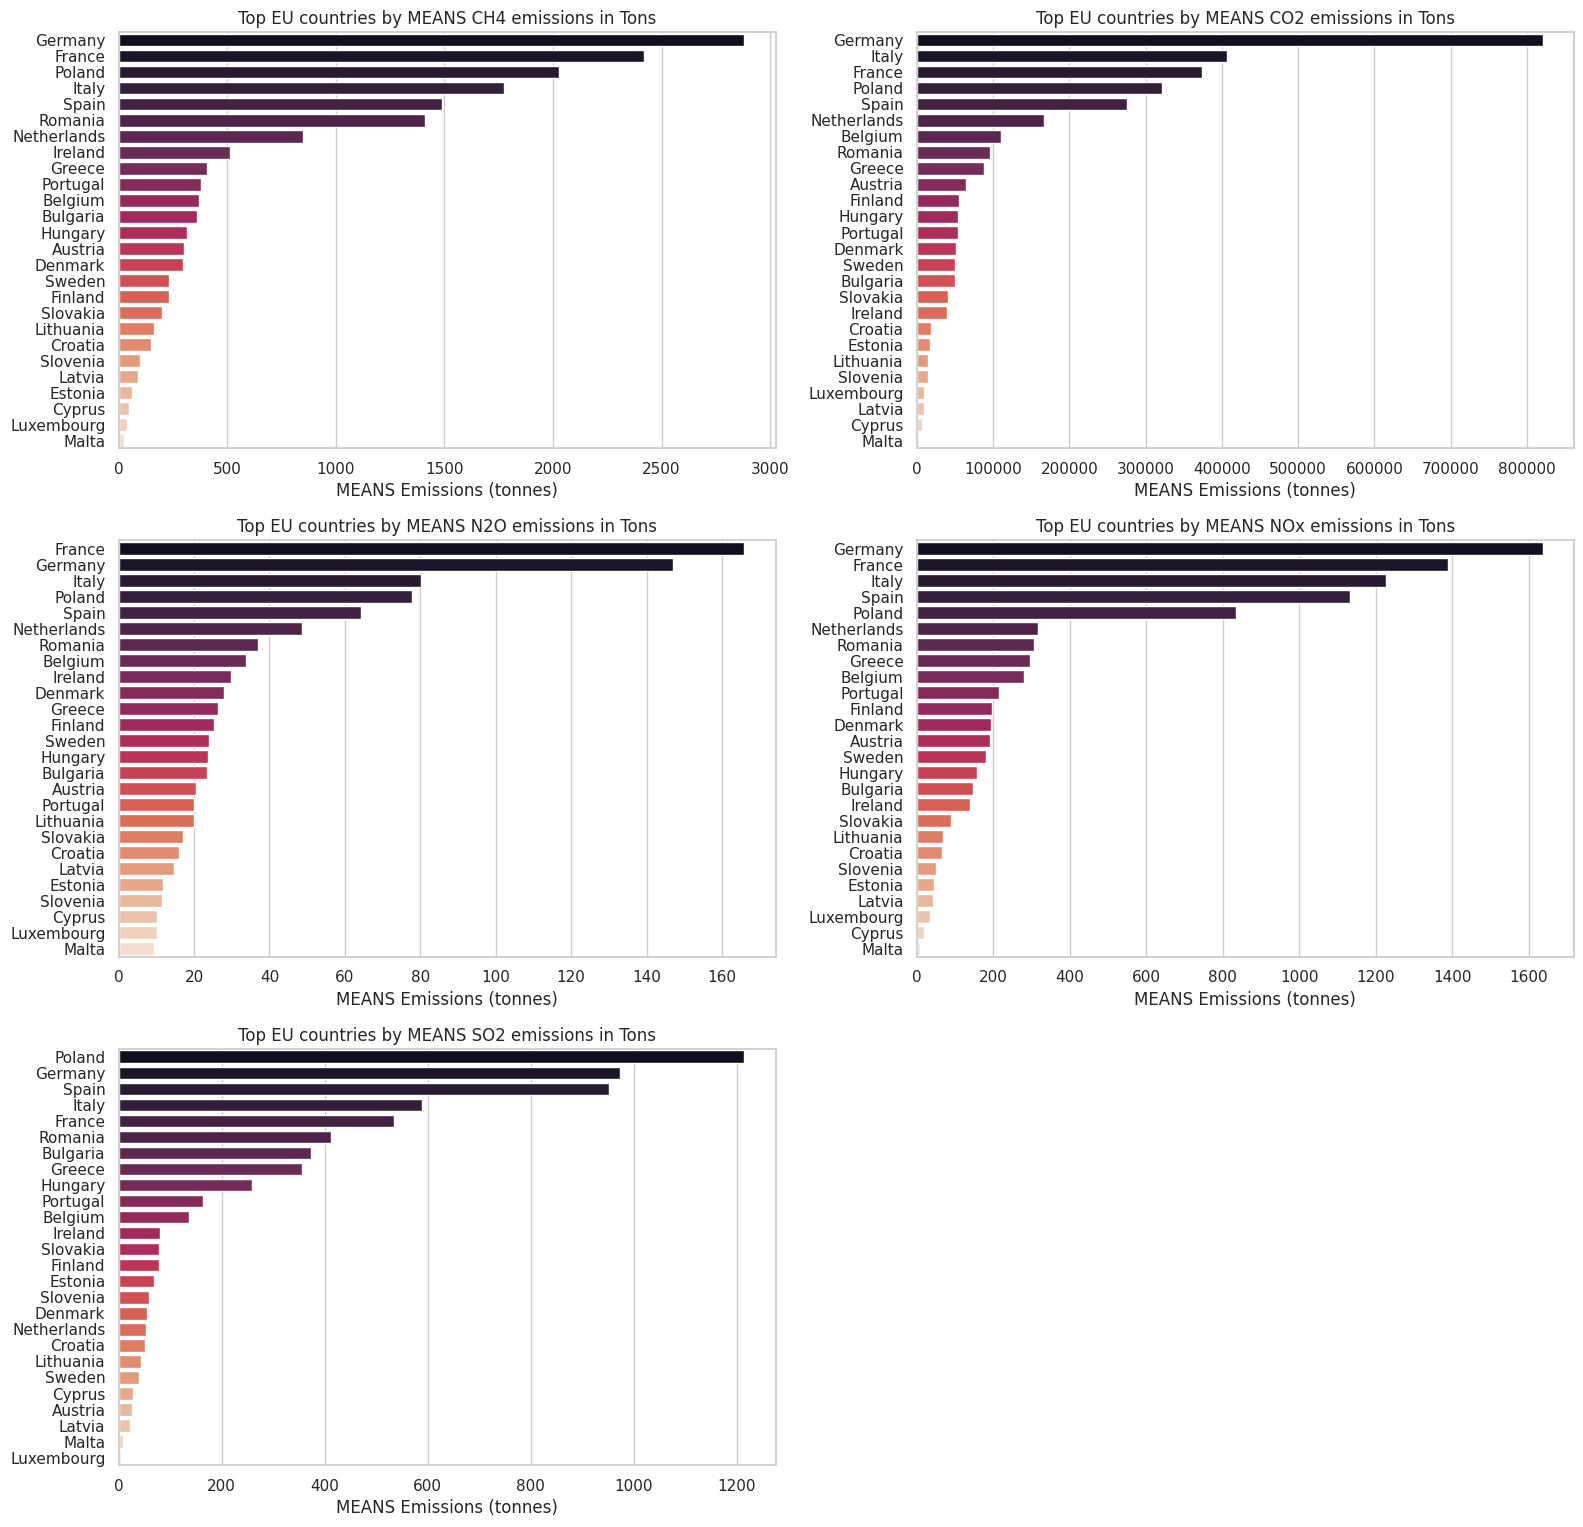

In [5]:


# Calcola la media totale in tonnellate per ogni inquinante
media_inquinanti_df = merged_df.groupby('Country')[inquinanti].mean().reset_index()

bar_visulization(media_inquinanti_df, "MEANS")


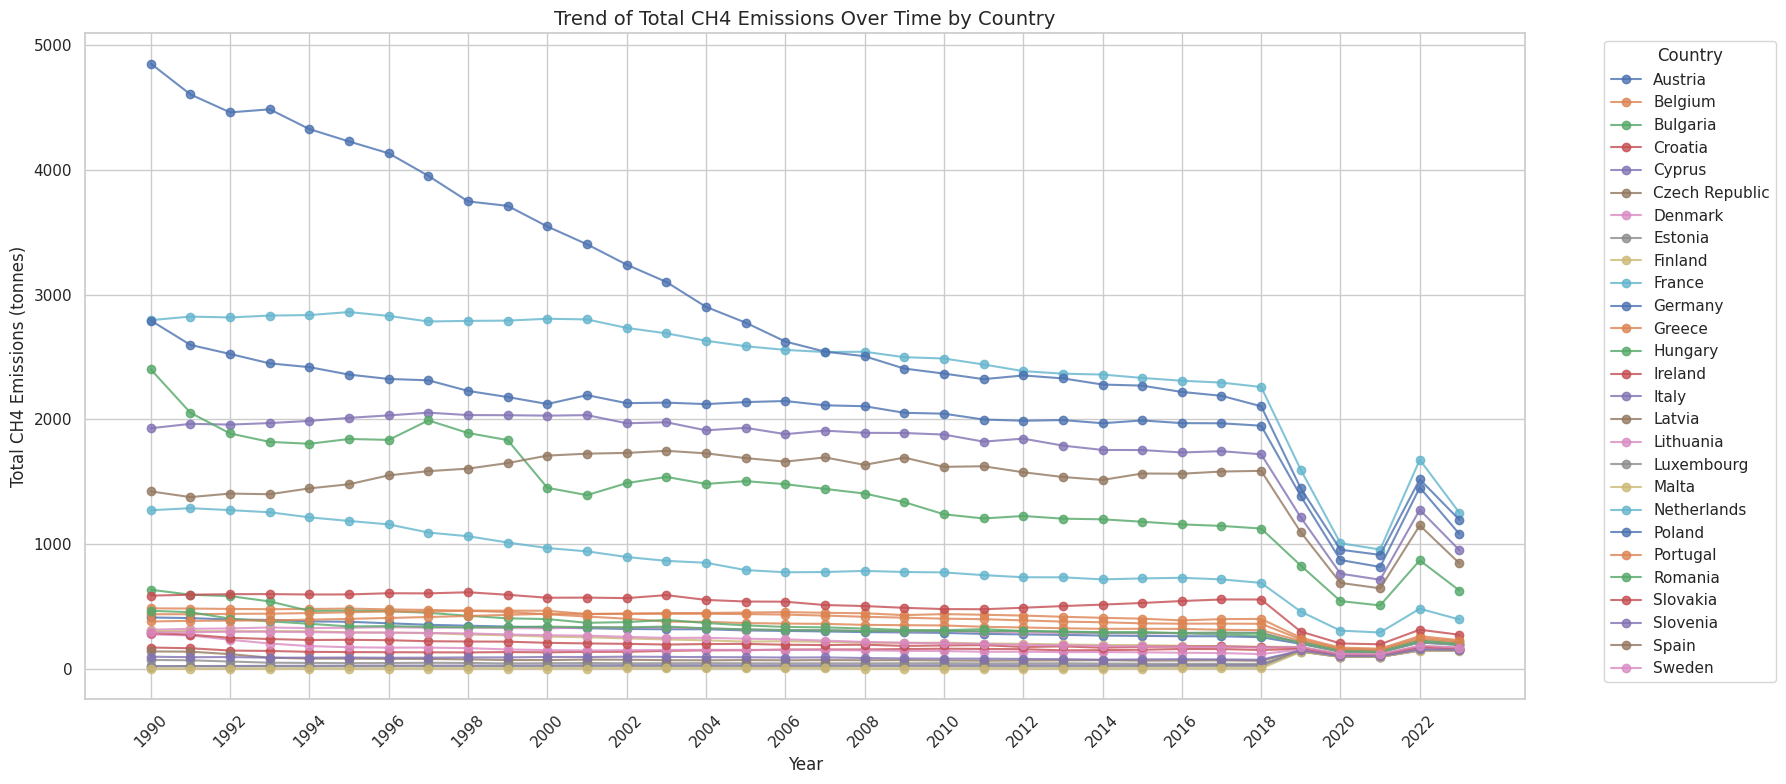

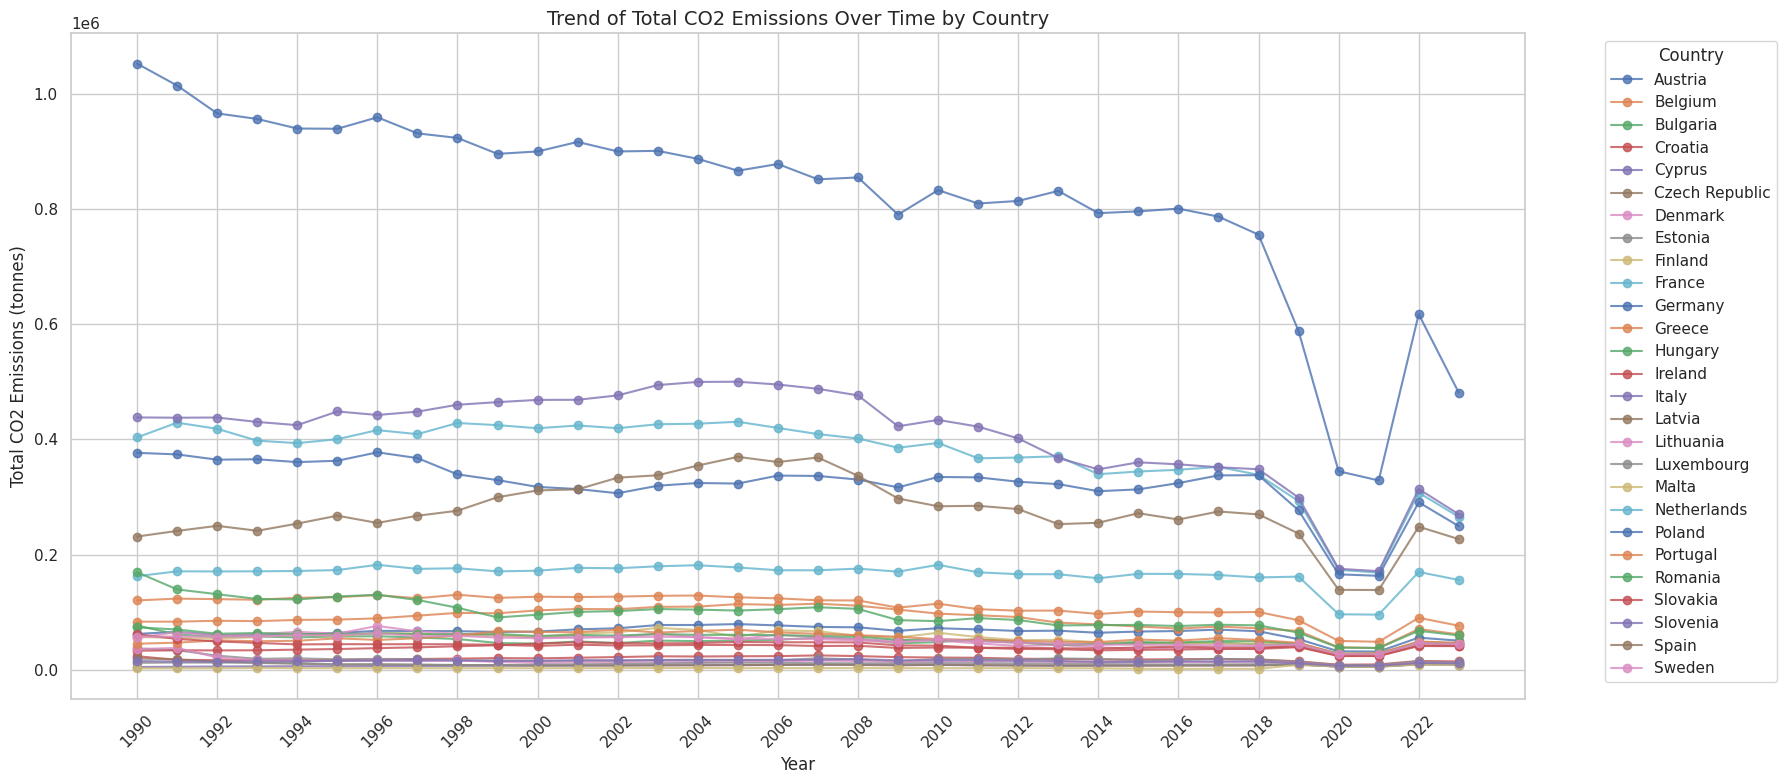

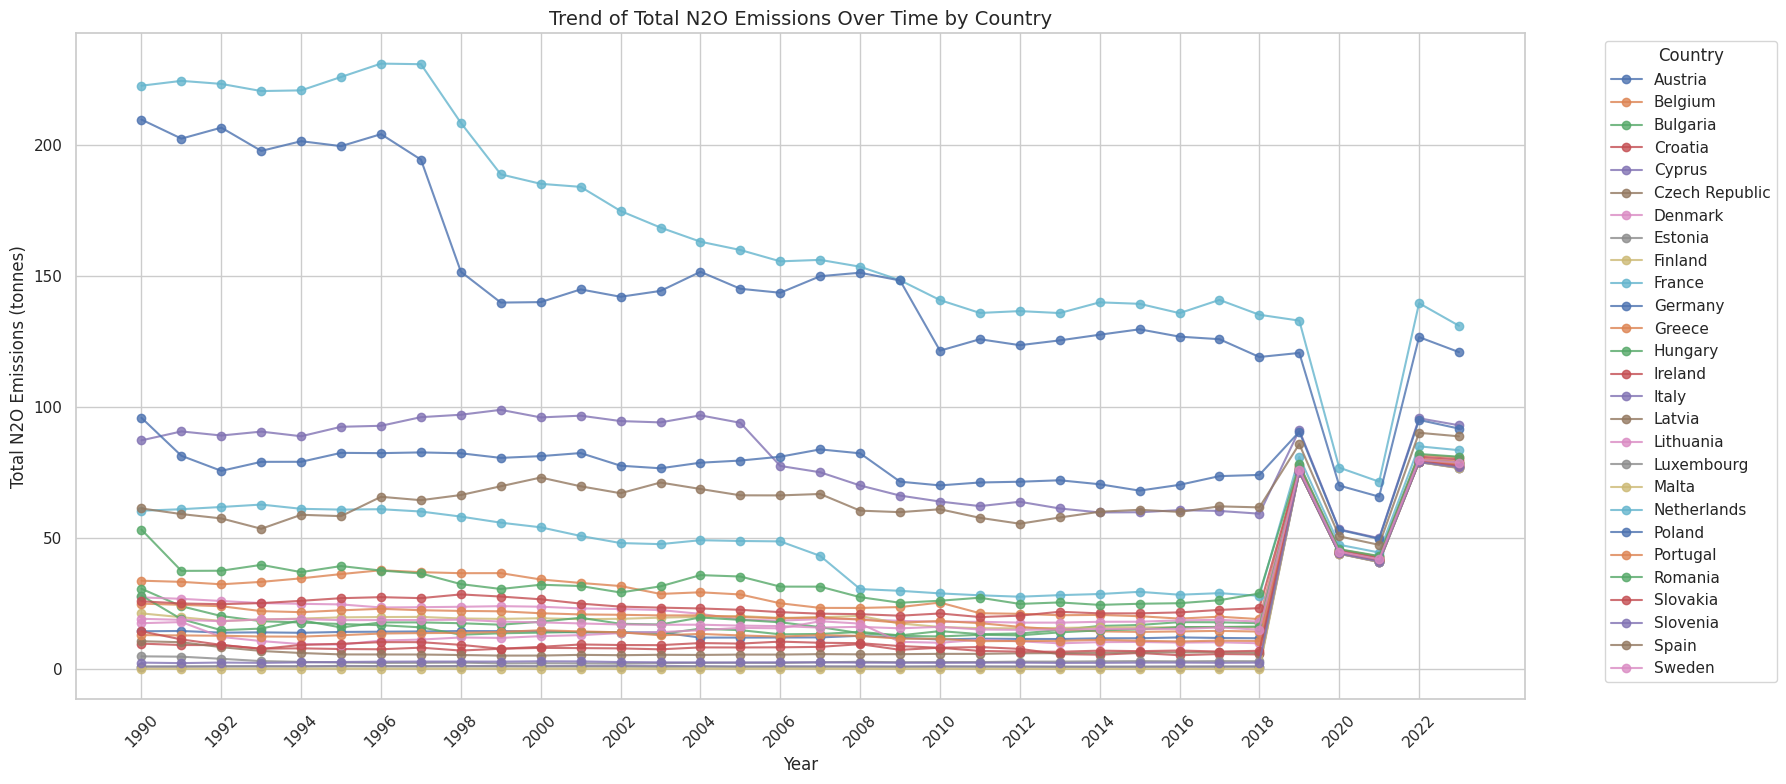

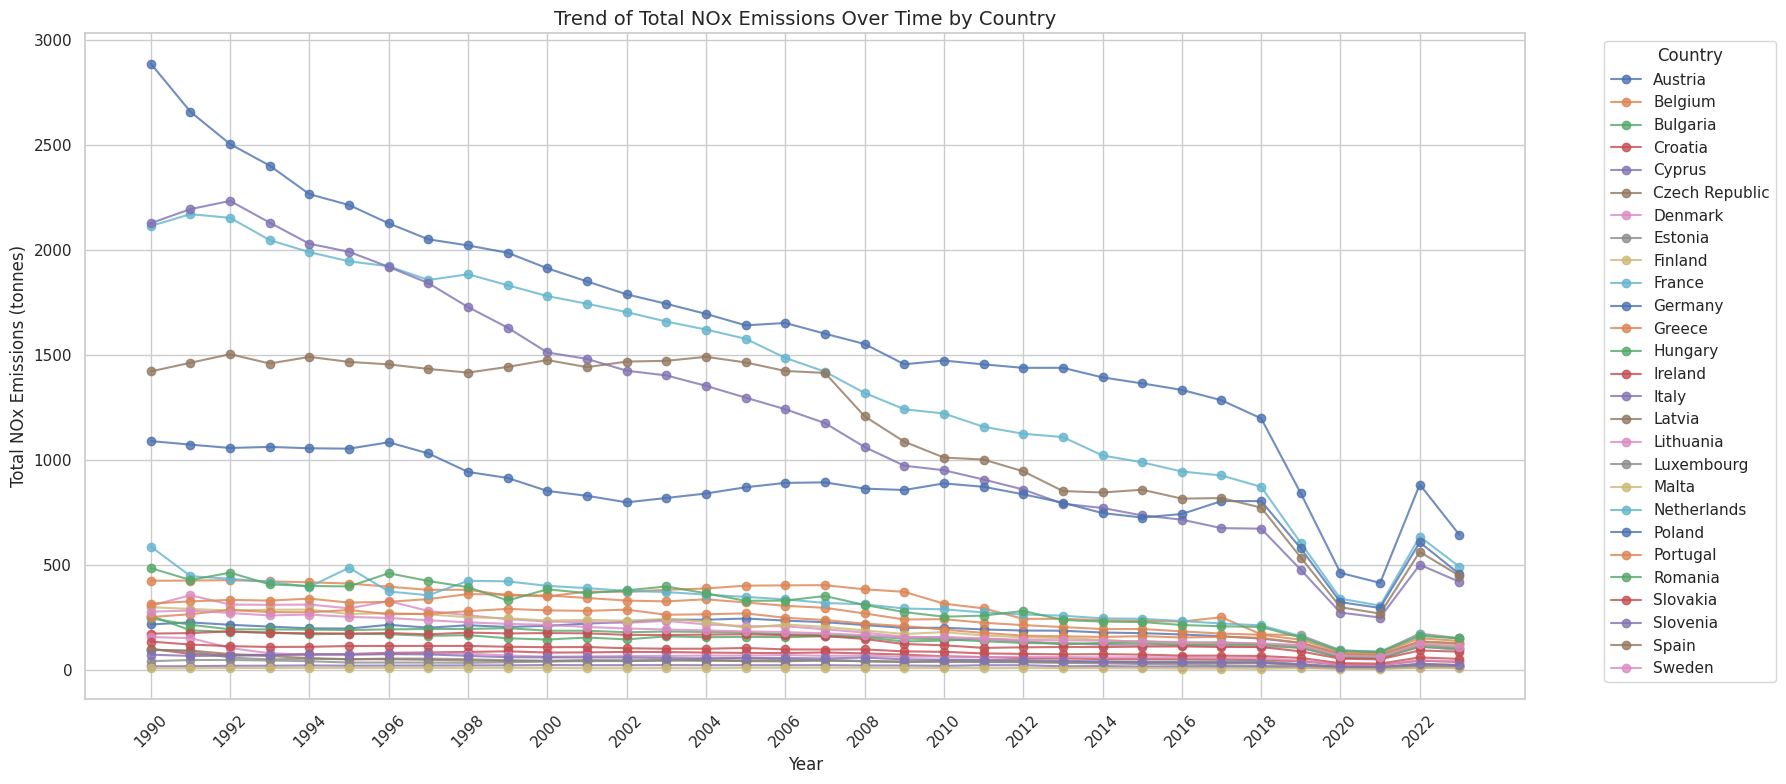

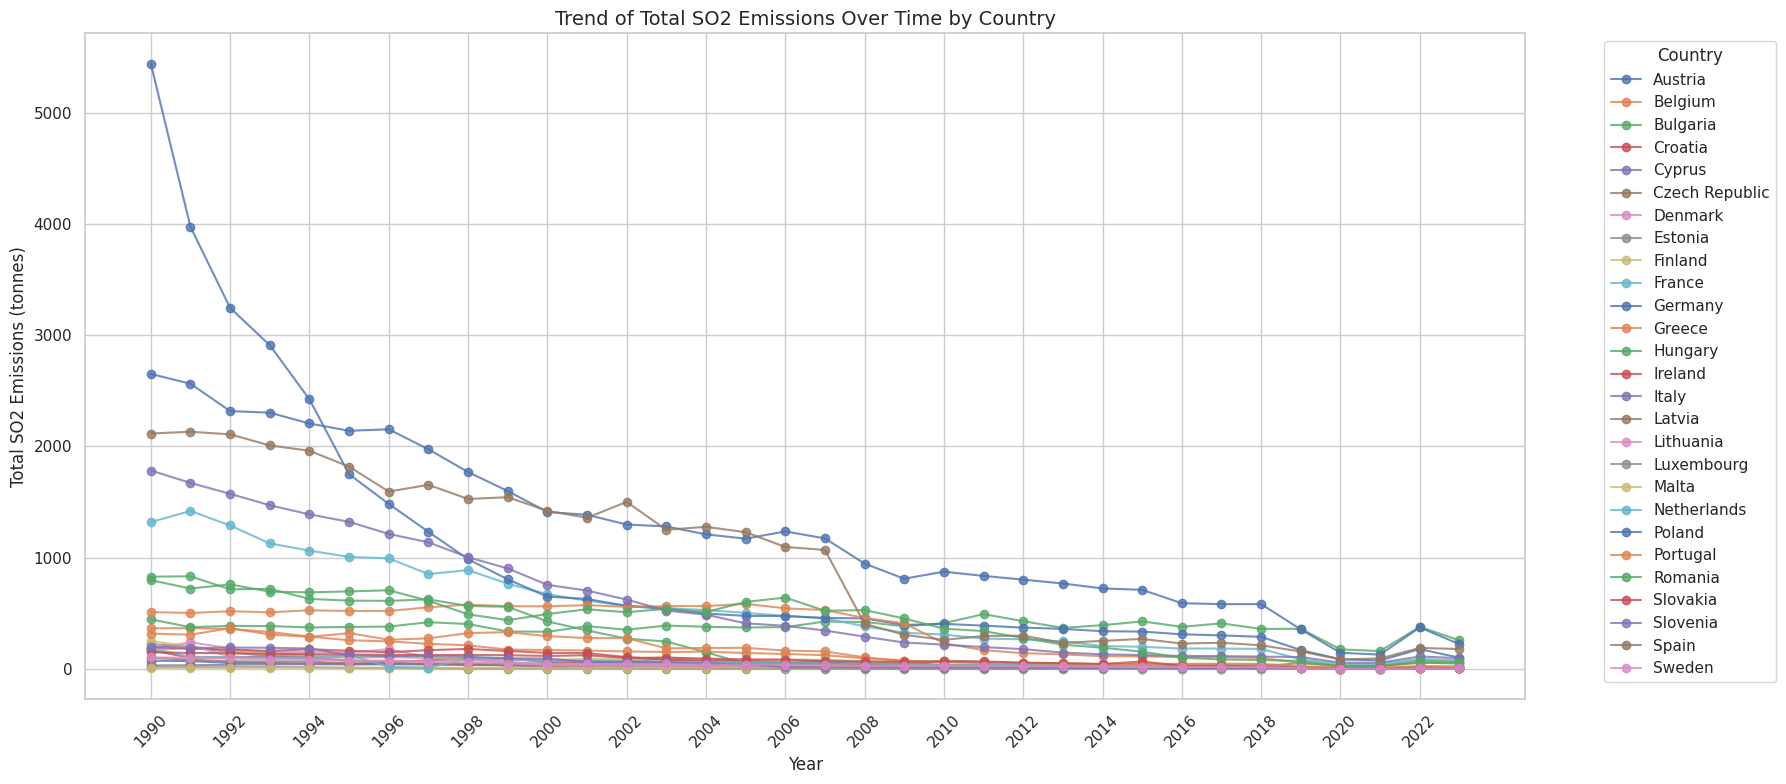

In [6]:
# trend inquinamento

def trend_visualization_country(df, pollutant, countries):
  """
  Genera un grafico a linee per visualizzare il trend delle emissioni nel tempo per ogni paese
  per un inquinante specifico.

  Args:
    df: DataFrame contenente le emissioni per paese e anno.
    pollutant: La colonna dell'emissione da visualizzare.
    countries: Lista dei paesi per cui generare i grafici.
  """
  plt.figure(figsize=(18, 8))

  # Collect handles and labels for the legend
  handles, labels = [], []

  # Plot trend for each country
  for country in countries:
    df_country_trend = df[df['Country'] == country].groupby('Year')[pollutant].sum().reset_index()
    line, = plt.plot(df_country_trend['Year'], df_country_trend[pollutant], marker='o', label=country, alpha=0.8)
    handles.append(line)
    labels.append(country)


  plt.title(f'Trend of Total {pollutant} Emissions Over Time by Country', fontsize=14)
  plt.xlabel('Year')
  plt.ylabel(f'Total {pollutant} Emissions (tonnes)')
  plt.xticks(range(1990, 2024, 2), rotation=45) # Set ticks for every other year from 1990 to 2023
  plt.grid(True)
  plt.legend(handles, labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')


  plt.tight_layout()
  plt.show()

# Esempio di utilizzo della funzione per visualizzare il trend delle emissioni
for inquinante in inquinanti:
  trend_visualization_country(merged_df, inquinante, eu_countries)


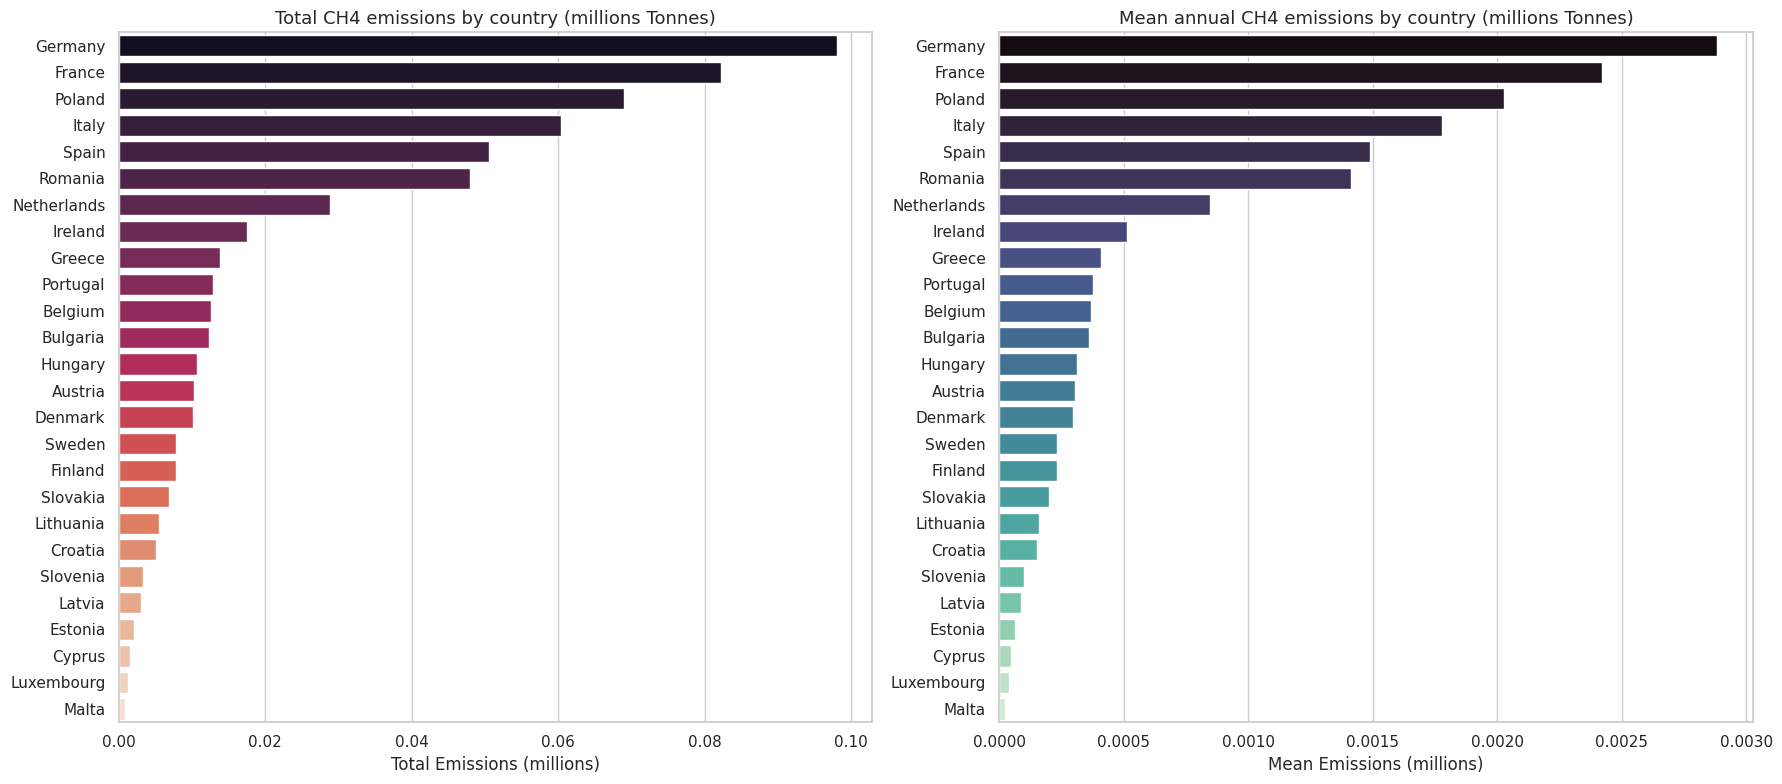

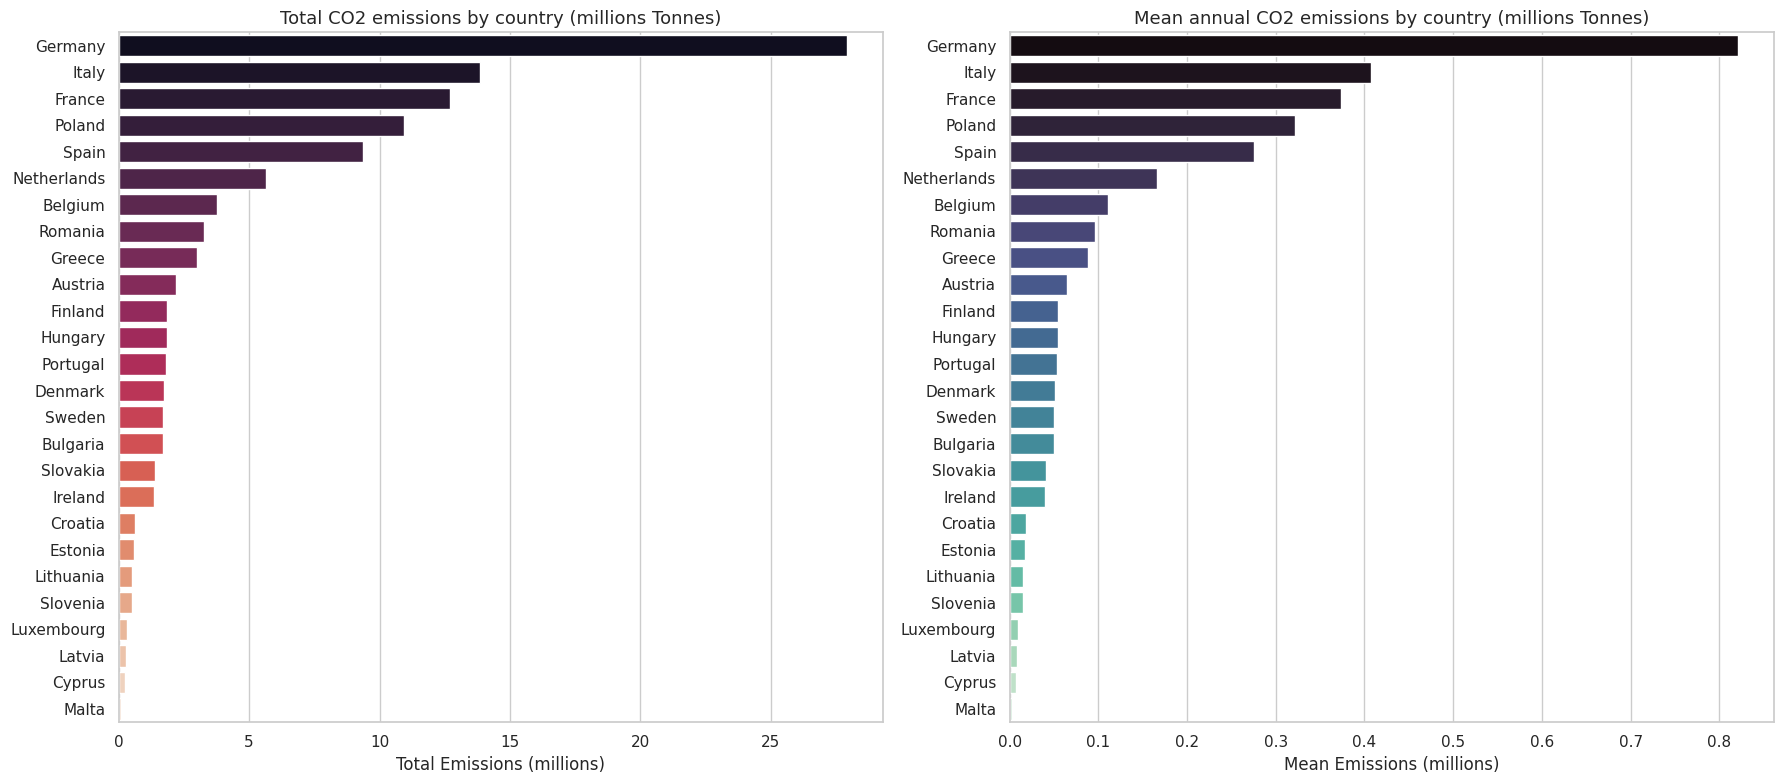

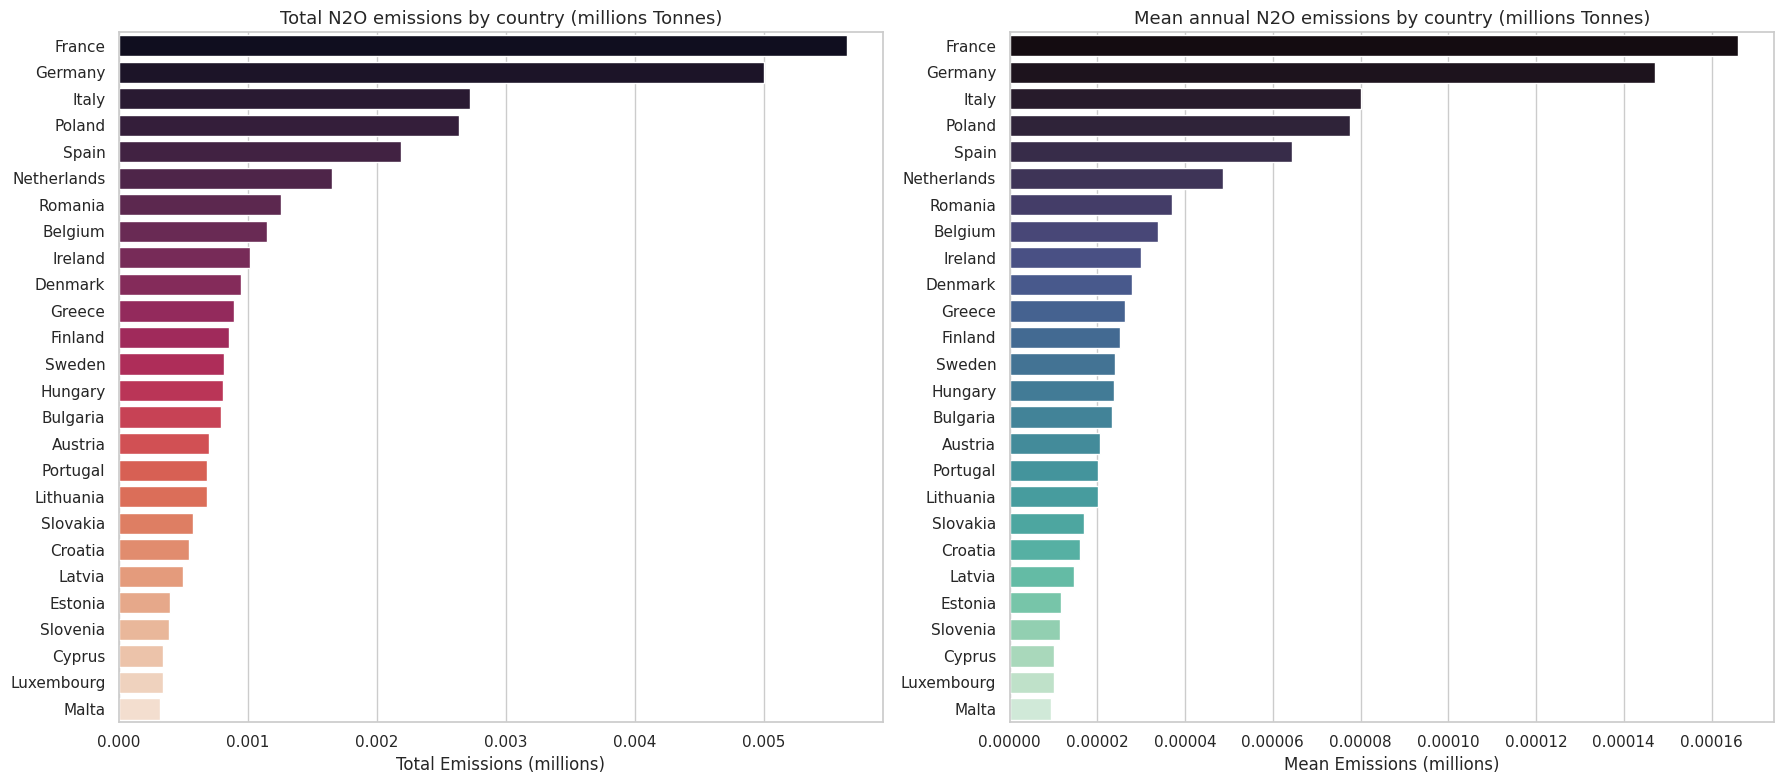

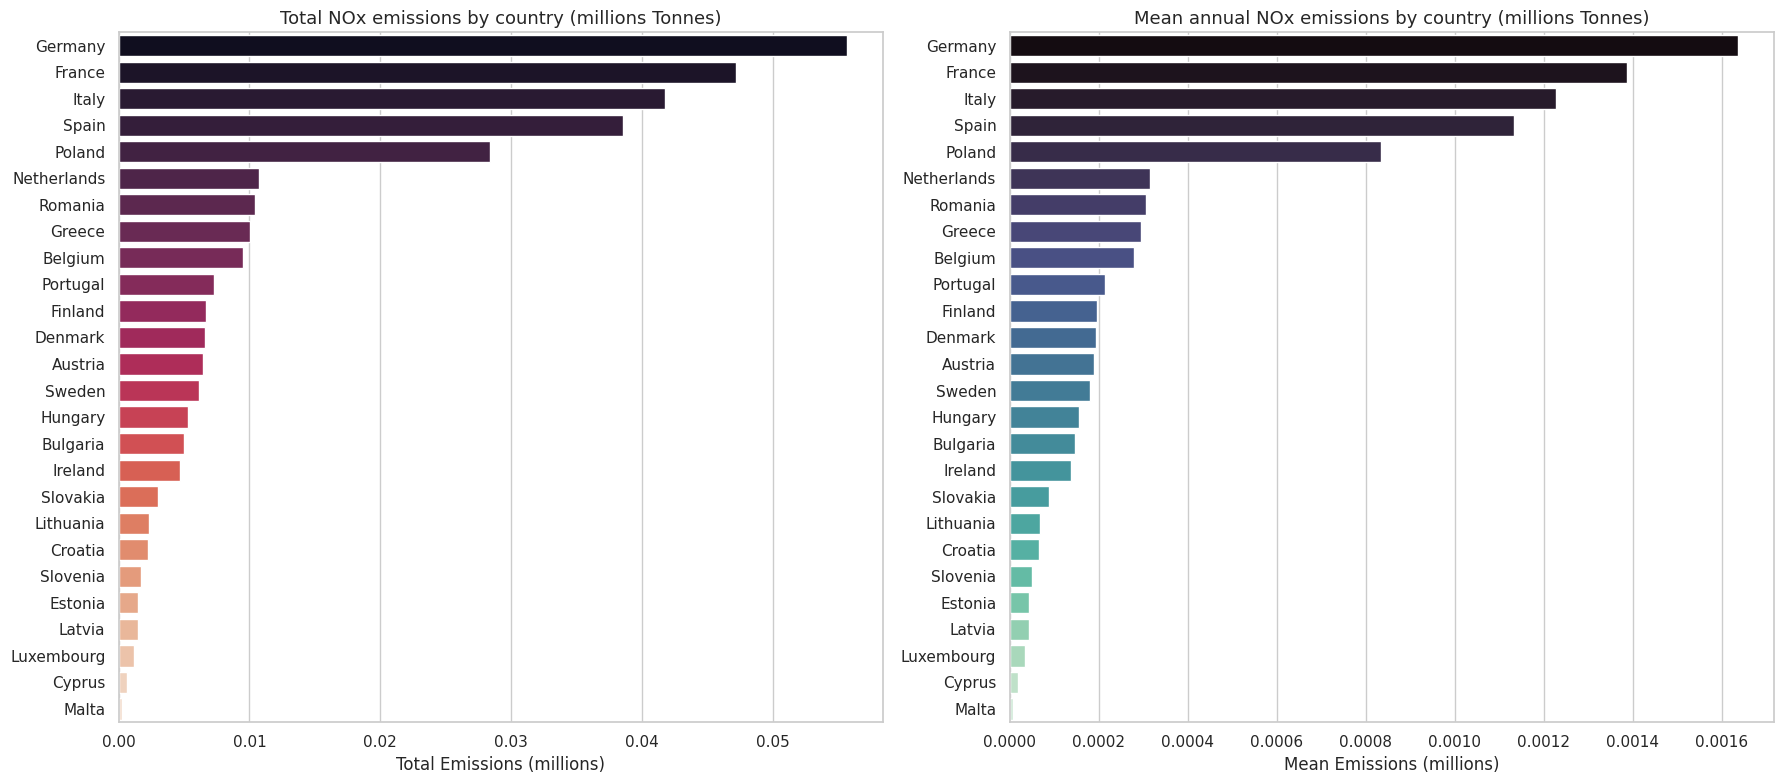

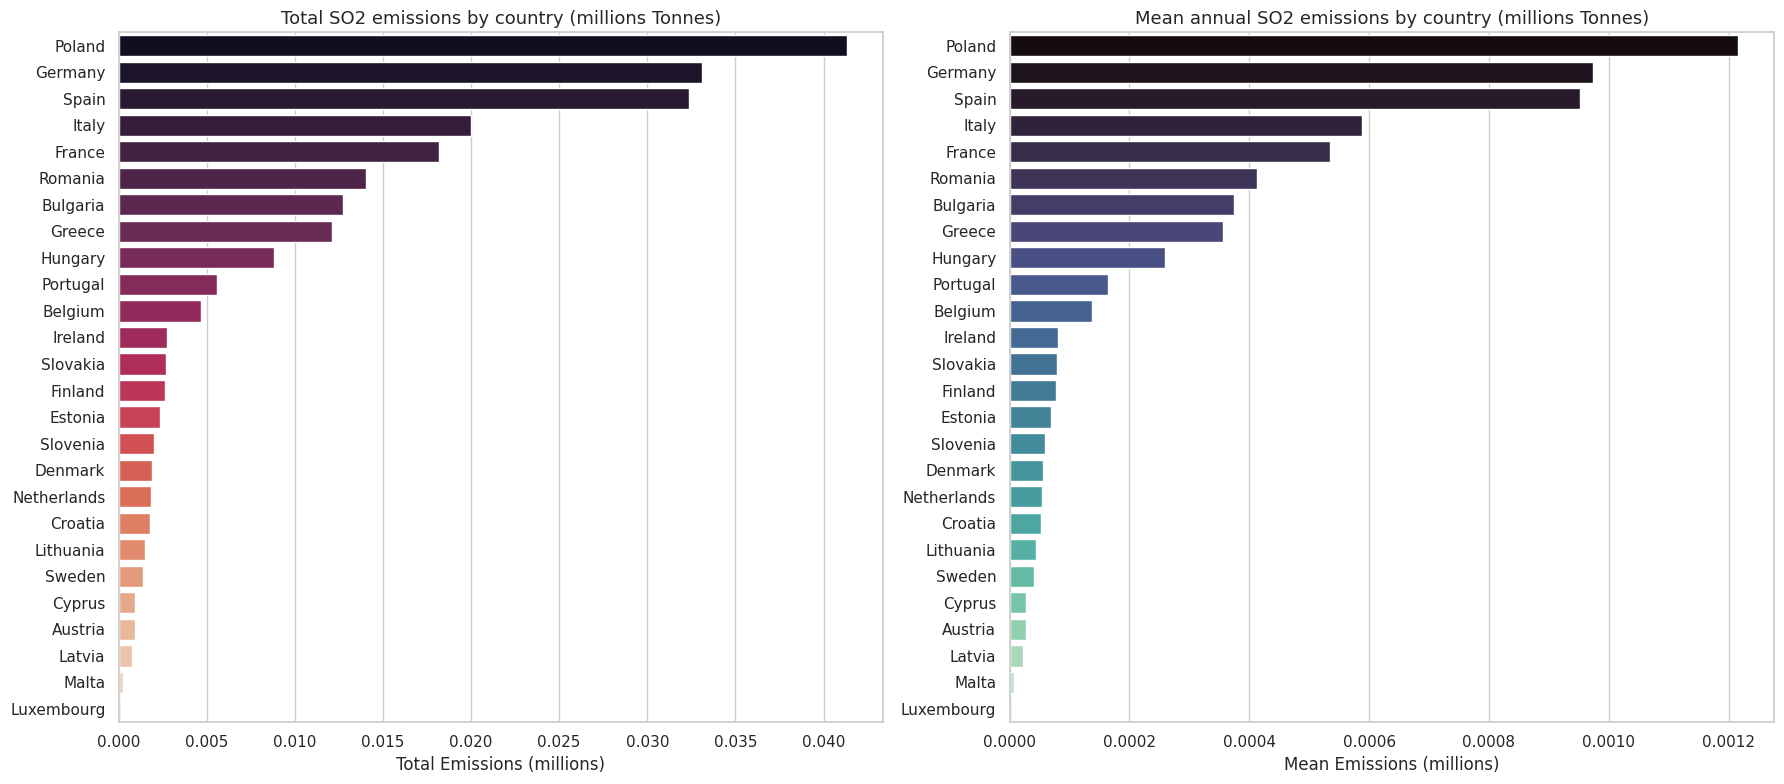

In [7]:
def visualization(totale_df, media_df, inquinante):
    fig, axes = plt.subplots(ncols=2, figsize=(18, 8))

    # TOT (converti in milioni)
    totale_df_milioni = totale_df.copy()
    totale_df_milioni[inquinante] = totale_df_milioni[inquinante] / 1_000_000
    totale_sorted = totale_df_milioni.sort_values(by=inquinante, ascending=False)

    sns.barplot(
        x=inquinante, y='Country',
        data=totale_sorted,
        ax=axes[0],
        palette='rocket',
        hue='Country',
        dodge=False,
        legend=False
    )
    axes[0].set_title(f'Total {inquinante} emissions by country (millions Tonnes)', fontsize=13)
    axes[0].set_xlabel('Total Emissions (millions)')
    axes[0].set_ylabel('')

    # MEAN (converti in milioni)
    media_df_milioni = media_df.copy()
    media_df_milioni[inquinante] = media_df_milioni[inquinante] / 1_000_000
    media_sorted = media_df_milioni.sort_values(by=inquinante, ascending=False)

    sns.barplot(
        x=inquinante, y='Country',
        data=media_sorted,
        ax=axes[1],
        palette='mako',
        hue='Country',
        dodge=False,
        legend=False
    )
    axes[1].set_title(f'Mean annual {inquinante} emissions by country (millions Tonnes)', fontsize=13)
    axes[1].set_xlabel('Mean Emissions (millions)')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

valori = ['CH4','CO2','N2O','NOx','SO2']

for inquinante in valori:
  visualization(totale_inquinanti_df, media_inquinanti_df, inquinante)


In [8]:
"""
OPTI DA Climate Project - 04 - Esplorazione dei Dati sulle Energie
Top paesi per produzione di energia rinnovabile nel 2023
"""

rinnovabili_df_eu_2023 = merged_df[merged_df['Year'] == 2023].copy().sort_values(by='Renewable_Electricity', ascending=False)
CH4_top2023_df = merged_df[merged_df['Year'] == 2023].copy().sort_values(by='CH4', ascending=False)
CO2_top2023_df = merged_df[merged_df['Year'] == 2023].copy().sort_values(by='CO2', ascending=False)
N2O_top2023_df = merged_df[merged_df['Year'] == 2023].copy().sort_values(by='N2O', ascending=False)
NOx_top2023_df = merged_df[merged_df['Year'] == 2023].copy().sort_values(by='NOx', ascending=False)
SO2_top2023_df = merged_df[merged_df['Year'] == 2023].copy().sort_values(by='SO2', ascending=False)
N2O_top2023_df

,unique_key,Country,Year,CH4,CO2,N2O,NOx,SO2,Renewable_Electricity
305,France_2023,France,2023,1253.19,265403.90,131.11,491.04,78.29,15.79
339,Germany_2023,Germany,2023,1196.97,480950.90,121.05,642.90,100.68,26.82
475,Italy_2023,Italy,2023,954.28,269866.00,93.13,419.31,96.91,28.71
679,Poland_2023,Poland,2023,1083.24,249240.02,91.86,456.00,222.69,11.25
849,Spain_2023,Spain,2023,848.85,226716.02,88.91,448.08,179.33,31.31
645,Netherlands_2023,Netherlands,2023,399.45,155811.48,83.61,149.43,4.96,10.78
747,Romania_2023,Romania,2023,631.39,59525.86,81.12,149.76,62.67,37.52
67,Belgium_2023,Belgium,2023,215.46,76322.98,80.91,137.91,15.46,13.11
441,Ireland_2023,Ireland,2023,277.36,41300.66,80.15,86.44,8.47,27.59
203,Denmark_2023,Denmark,2023,197.33,44543.35,79.64,94.15,4.75,49.88


In [9]:
def visualize_top(df, column='Renewable_Electricity', titlelabel="label", top_n=10, xlabel="xlabel", palette='crest'):
    """
    Visualizza la classifica dei paesi europei con la maggiore produzione di energia rinnovabile.

    Args:
        df (pd.DataFrame): DataFrame contenente i dati con almeno le colonne 'Country' e la colonna indicata.
        column (str): Nome della colonna con i dati di energia rinnovabile.
        top_n (int): Numero di paesi da visualizzare (default: 10).
    """
    # Copia e conversione in milioni
    df_milioni = df.copy()
    #df_milioni[column] = df_milioni[column] / 1_000_000

    # Ordinamento e selezione top
    top_df = df_milioni.sort_values(by=column, ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(18, 8))
    sns.barplot(
        x=column,
        y='Country',
        data=top_df,
        palette=f'{palette}',
        dodge=False
    )

    plt.title(f'{titlelabel}', fontsize=14)
    plt.xlabel(f'{xlabel}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()




/tmp/ipython-input-3327306586.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


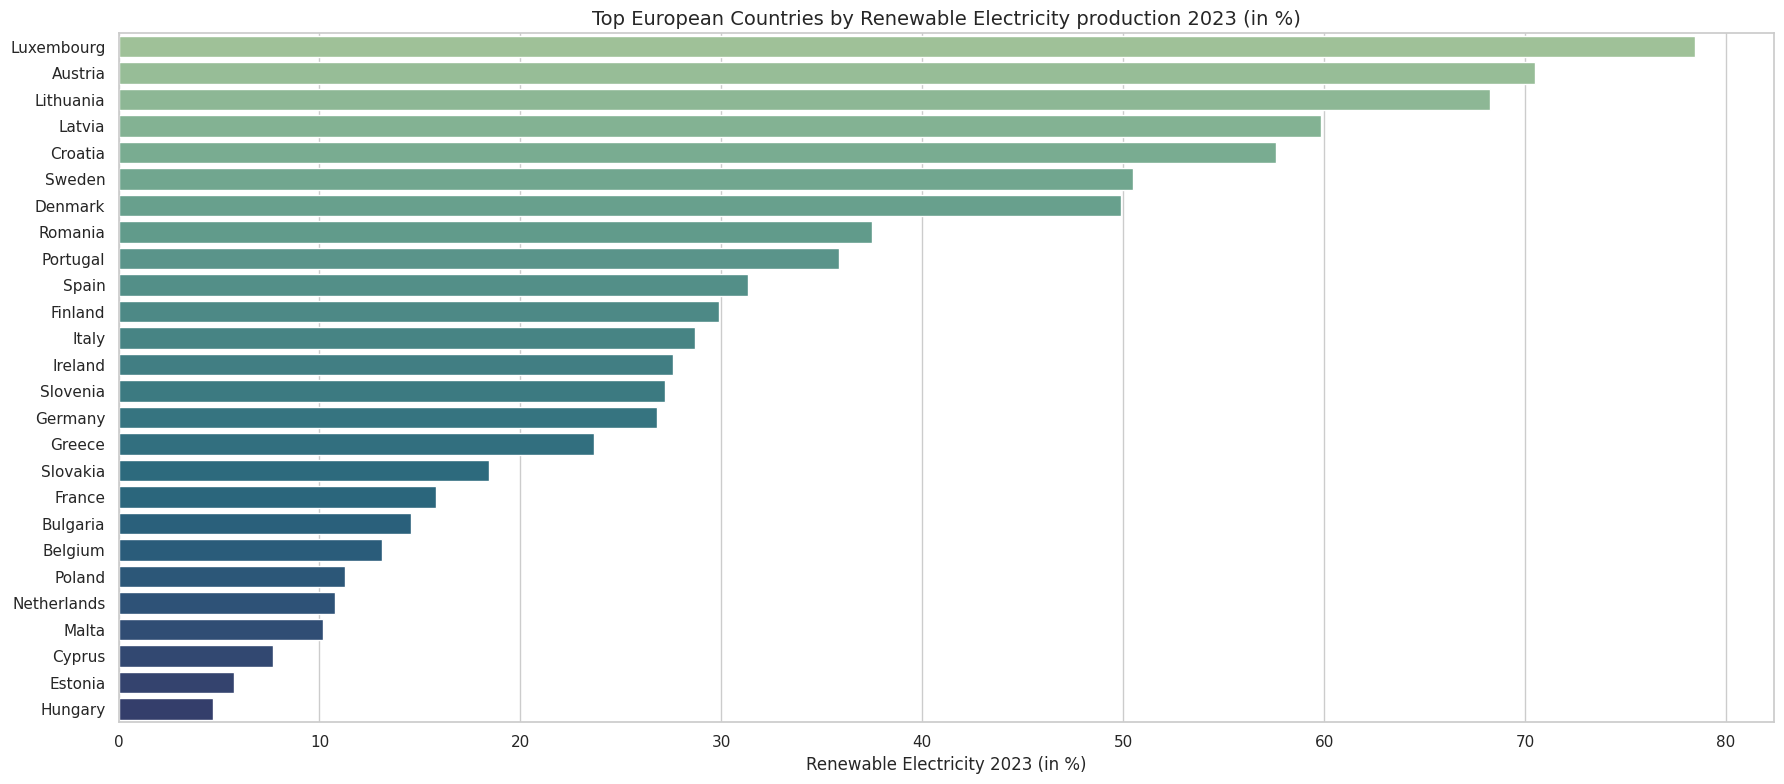

In [10]:
visualize_top(rinnovabili_df_eu_2023, column='Renewable_Electricity', titlelabel='Top European Countries by Renewable Electricity production 2023 (in %)', top_n=27, xlabel='Renewable Electricity 2023 (in %)', palette='crest')


/tmp/ipython-input-3327306586.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


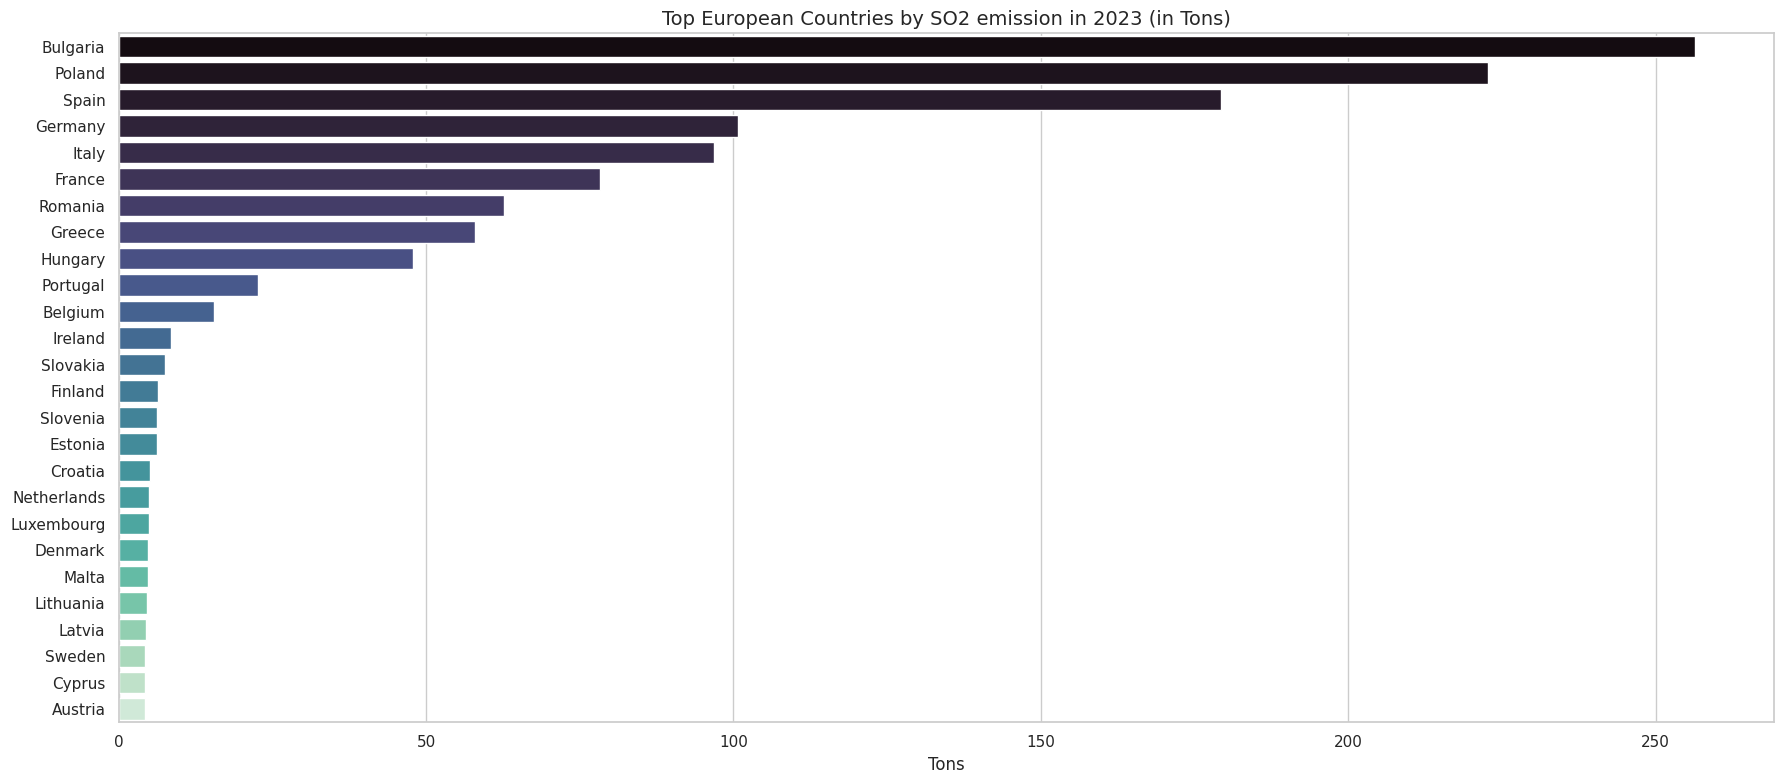

In [11]:
# CH4 2023
visualize_top(SO2_top2023_df, column='SO2', titlelabel='Top European Countries by SO2 emission in 2023 (in Tons)', top_n=27, xlabel='Tons', palette='mako')


In [12]:
rinnovabili_df_eu_from_2005 = merged_df[merged_df['Year'] >= 2005].copy()
rinnovabili_df_eu_from_2005.head()

,unique_key,Country,Year,CH4,CO2,N2O,NOx,SO2,Renewable_Electricity
15,Austria_2005,Austria,2005,312.00,79192.43,12.09,244.39,25.86,61.04
16,Austria_2006,Austria,2006,308.01,76898.33,12.12,234.49,26.69,61.91
17,Austria_2007,Austria,2007,303.81,74262.59,12.16,226.82,23.34,63.42
18,Austria_2008,Austria,2008,298.78,73588.40,12.77,213.42,20.23,63.91
19,Austria_2009,Austria,2009,295.73,67493.95,12.02,199.59,14.70,66.13


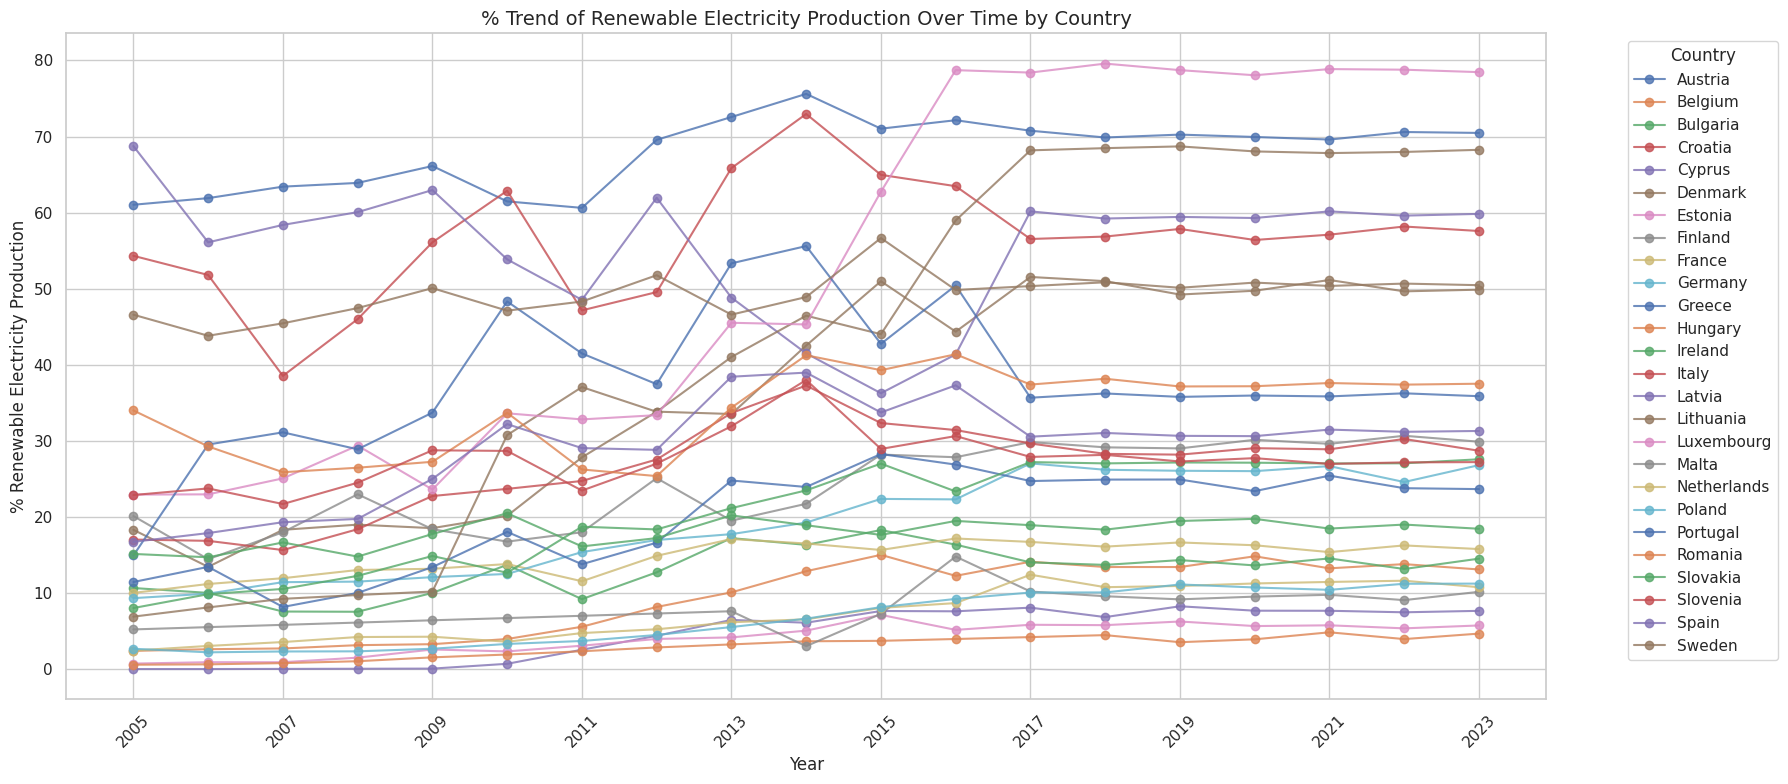

In [13]:
def renewable_energy_trend_visualization(df):
  """
  Genera un grafico a linee per visualizzare il trend della produzione di energia rinnovabile nel tempo per ogni paese.

  Args:
    df: DataFrame contenente i dati di energia rinnovabile per paese e anno.
  """
  plt.figure(figsize=(18, 8))

  # Collect handles and labels for the legend
  handles, labels = [], []

  # Plot trend for each country
  for country in df['Country'].unique():
    df_country_trend = df[df['Country'] == country].groupby('Year')['Renewable_Electricity'].sum().reset_index()
    line, = plt.plot(df_country_trend['Year'], df_country_trend['Renewable_Electricity'], marker='o', label=country, alpha=0.8)
    handles.append(line)
    labels.append(country)

  plt.title('% Trend of Renewable Electricity Production Over Time by Country', fontsize=14)
  plt.xlabel('Year')
  plt.ylabel('% Renewable Electricity Production')
  plt.xticks(range(df['Year'].min(), df['Year'].max() + 1, 2), rotation=45) # Set ticks for every other year
  plt.grid(True)
  plt.legend(handles, labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

  plt.tight_layout()
  plt.show()

# Funzione per visualizzare il trend della produzione di energia rinnovabile
renewable_energy_trend_visualization(rinnovabili_df_eu_from_2005)

In [14]:
##### test
valori = ['CH4','CO2','N2O','NOx','SO2','Renewable_Electricity']


# filtro il df per i valori maggiori del 2025
df_from_2005 = merged_df[merged_df['Year'] >= 2005]
df_from_2005


,unique_key,Country,Year,CH4,CO2,N2O,NOx,SO2,Renewable_Electricity
15,Austria_2005,Austria,2005,312.00,79192.43,12.09,244.39,25.86,61.04
16,Austria_2006,Austria,2006,308.01,76898.33,12.12,234.49,26.69,61.91
17,Austria_2007,Austria,2007,303.81,74262.59,12.16,226.82,23.34,63.42
18,Austria_2008,Austria,2008,298.78,73588.40,12.77,213.42,20.23,63.91
19,Austria_2009,Austria,2009,295.73,67493.95,12.02,199.59,14.70,66.13
...,...,...,...,...,...,...,...,...,...
879,Sweden_2019,Sweden,2019,179.57,44184.39,76.17,116.14,4.44,50.13
880,Sweden_2020,Sweden,2020,123.55,26765.43,44.86,67.28,2.36,50.81
881,Sweden_2021,Sweden,2021,120.78,26849.85,41.98,62.87,2.31,50.37
882,Sweden_2022,Sweden,2022,188.55,46393.61,79.98,121.95,4.66,50.68


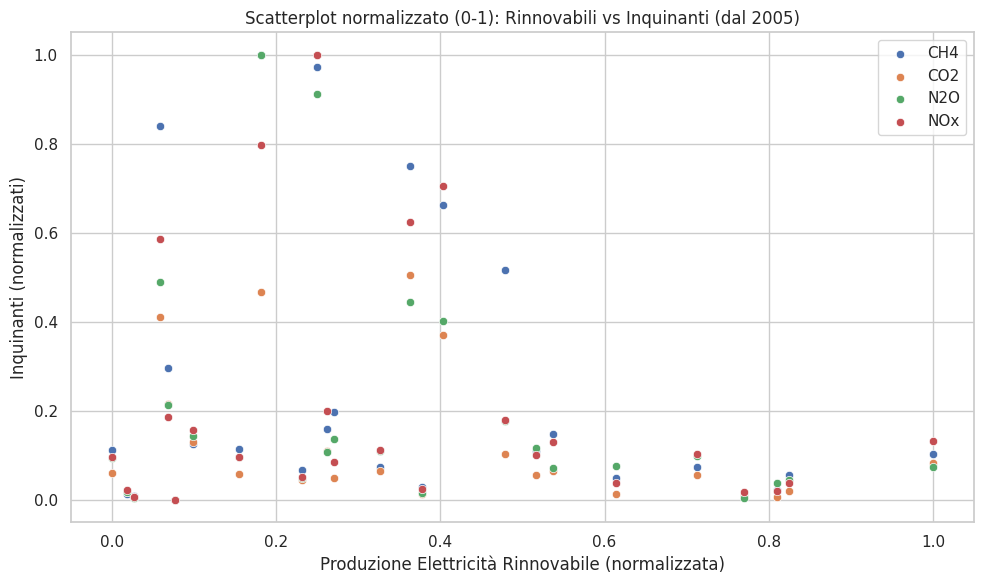

Correlazioni con Renewable_Electricity:
CH4   -0.223678
CO2   -0.212864
N2O   -0.225752
NOx   -0.192322
Name: Renewable_Electricity, dtype: float64


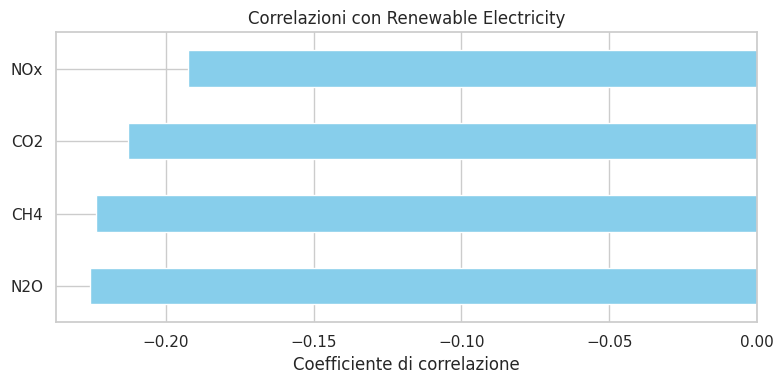

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Filtra dal 2005 in poi
df_from_2005 = merged_df[merged_df['Year'] >= 2005]

# Definisci le variabili da analizzare
valori = ['Renewable_Electricity', 'CH4', 'CO2', 'N2O', 'NOx']

# Calcola la media per paese
df_means = df_from_2005.groupby('Country')[valori].mean()

# Normalizza i valori tra 0 e 1
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_means),
    columns=valori,
    index=df_means.index
)

# Scatterplot con dati normalizzati
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df_normalized, x='Renewable_Electricity', y='CH4', label='CH4')
sns.scatterplot(data=df_normalized, x='Renewable_Electricity', y='CO2', ax=ax, label='CO2')
sns.scatterplot(data=df_normalized, x='Renewable_Electricity', y='N2O', ax=ax, label='N2O')
sns.scatterplot(data=df_normalized, x='Renewable_Electricity', y='NOx', ax=ax, label='NOx')

plt.title('Scatterplot normalizzato (0-1): Rinnovabili vs Inquinanti (dal 2005)')
plt.xlabel('Produzione Elettricità Rinnovabile (normalizzata)')
plt.ylabel('Inquinanti (normalizzati)')
plt.legend()
plt.tight_layout()
plt.show()

# Calcolo delle correlazioni reali (sui dati originali)
correlazioni = df_means.corr()['Renewable_Electricity'][['CH4', 'CO2', 'N2O', 'NOx']]
print("Correlazioni con Renewable_Electricity:")
print(correlazioni)

# Barplot delle correlazioni
correlazioni.sort_values().plot(kind='barh', figsize=(8, 4), color='skyblue')
plt.title('Correlazioni con Renewable Electricity')
plt.xlabel('Coefficiente di correlazione')
plt.tight_layout()
plt.show()